## 0. Import Modules

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
import sys

In [2]:
import seaborn as sns

This notebook builds on the compiling done in LanguageNotebooks.ipynb, and loads datasets created in that file.

# 1. Load Data

## Load overlapping user data (one year to another year)

In [3]:
###Upload Overlap Dictionaries
OverlapFrames = []

for a_year in range(2007,2019):
    filename =  "user_overlap_10_19"+str(a_year)+".csv"
    df = pd.read_csv(filename, index_col=None, header=0)
    OverlapFrames.append(df)

user_overlap_df= pd.concat(OverlapFrames, axis=0, ignore_index=True)

In [33]:
###Upload Intersection Dictionaries
IntersectionFrames = []

for a_year in range(2010,2019):
    filename = "intersection_df_10_19_250k_"+str(a_year)+".csv"
    df = pd.read_csv(filename, index_col=None, header=0)
    IntersectionFrames.append(df)

IntersectionFrames_df = pd.concat(IntersectionFrames, axis=0, ignore_index=True)


In [34]:
IntersectionFrames_df

,Unnamed: 0,Year,BaseSample,Lang1,Lang2,L1Y1,L1Y2,L2Y1,L2Y2,L12Y1,...,L_2Y2,L12Y1_L12Y2,L12Y1_L1_Y2,L12Y1_L_2Y2,L1_Y1_L12Y2,L1_Y1_L1_Y2,L1_Y1_L_2Y2,L_2Y1_L12Y2,L_2Y1_L1_Y2,L_2Y1_L_2Y2
0,0,2010,53822,ruby,c++,15563,17409,4029,4633,698,...,3611,112,338,73,429,10617,237,113,246,1177
1,1,2010,53822,ruby,c,15563,17409,6103,6836,1350,...,4997,309,615,160,767,9805,311,244,334,1802
2,2,2010,53822,ruby,shell,15563,17409,3229,4993,1059,...,2951,205,608,59,1075,9608,336,95,328,417
3,3,2010,53822,ruby,javascript,15563,17409,14991,19010,5093,...,11921,2221,1641,751,2392,5242,974,1172,897,4560
4,4,2010,53822,ruby,python,15563,17409,9577,11089,1380,...,8810,283,494,304,780,9939,383,600,434,4480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94303,22947,2018,250000,dockerfile,webassembly,2704,3029,133,60,10,...,57,0,3,2,1,438,5,0,3,7
94304,22948,2018,250000,dockerfile,angelscript,2704,3029,14,11,0,...,11,0,0,0,0,442,0,0,0,1
94305,22949,2018,250000,dockerfile,nextflow,2704,3029,7,10,1,...,10,0,0,1,0,442,1,0,0,2
94306,22950,2018,250000,dockerfile,solidity,2704,3029,95,59,4,...,56,0,1,0,0,441,3,0,1,6


In [35]:
IntersectionFrames_df['Lang1Perc'] = IntersectionFrames_df['L1Y1']/IntersectionFrames_df['BaseSample']
IntersectionFrames_df['Lang2Perc'] = IntersectionFrames_df['L1Y2']/IntersectionFrames_df['BaseSample']

In [36]:
IntersectionFrames_df['L__Y1_L12Y2'] = IntersectionFrames_df['L12Y2']-IntersectionFrames_df['L1_Y1_L12Y2']-IntersectionFrames_df['L12Y1_L12Y2']-IntersectionFrames_df['L_2Y1_L12Y2'] 
IntersectionFrames_df['L__Y1_L_2Y2'] = IntersectionFrames_df['L_2Y2']-IntersectionFrames_df['L1_Y1_L_2Y2']-IntersectionFrames_df['L12Y1_L_2Y2']-IntersectionFrames_df['L_2Y1_L_2Y2'] 

In [37]:
IntersectionFrames_df['L__Y1'] = IntersectionFrames_df['BaseSample'] - IntersectionFrames_df['L1Y1'] - IntersectionFrames_df['L2Y1'] + IntersectionFrames_df['L12Y1'] 

In [38]:
IntersectionFrames_df['PBR_Num'] = (IntersectionFrames_df['L1_Y1_L12Y2'] + IntersectionFrames_df['L1_Y1_L_2Y2']+1)/(IntersectionFrames_df['L1_Y1']+1)
IntersectionFrames_df['PBR_Denom'] = (IntersectionFrames_df['L__Y1_L12Y2'] + IntersectionFrames_df['L__Y1_L_2Y2']+1)/(IntersectionFrames_df['L__Y1']+1)
IntersectionFrames_df['PBR'] = IntersectionFrames_df['PBR_Num']/IntersectionFrames_df['PBR_Denom']
IntersectionFrames_df['LogPBR'] =np.log(pd.to_numeric(IntersectionFrames_df['PBR']))

In [39]:
IntersectionFrames_df['L12Y1_L__Y2'] = IntersectionFrames_df['L12Y1']-IntersectionFrames_df['L12Y1_L_2Y2']-IntersectionFrames_df['L12Y1_L1_Y2']-IntersectionFrames_df['L12Y1_L12Y2'] 
IntersectionFrames_df['L_2Y1_L__Y2'] = IntersectionFrames_df['L_2Y1']-IntersectionFrames_df['L_2Y1_L_2Y2']-IntersectionFrames_df['L_2Y1_L1_Y2']-IntersectionFrames_df['L_2Y1_L12Y2'] 


In [40]:
IntersectionFrames_df['CBR_Num'] = (IntersectionFrames_df['L12Y1_L1_Y2'] + IntersectionFrames_df['L12Y1_L__Y2']+1)/(IntersectionFrames_df['L12Y1']+1)
IntersectionFrames_df['CBR_Denom'] = (IntersectionFrames_df['L_2Y1_L1_Y2'] + IntersectionFrames_df['L_2Y1_L__Y2']+1)/(IntersectionFrames_df['L_2Y1']+1)
IntersectionFrames_df['CBR'] = IntersectionFrames_df['CBR_Num']/IntersectionFrames_df['CBR_Denom']
IntersectionFrames_df['LogCBR'] =np.log(pd.to_numeric(IntersectionFrames_df['CBR']))

In [41]:
IntersectionFrames_df_Minimum =IntersectionFrames_df[(IntersectionFrames_df['Lang1Perc']>0.01) & (IntersectionFrames_df['Lang2Perc']>0.01)]

In [42]:
IntersectionFrames_df_Minimum['Lang1']

0              ruby
1              ruby
2              ruby
3              ruby
4              ruby
            ...    
94303    dockerfile
94304    dockerfile
94305    dockerfile
94306    dockerfile
94307    dockerfile
Name: Lang1, Length: 14640, dtype: object

count    14640.000000
mean         0.657254
std          0.706376
min         -1.658633
25%          0.168901
50%          0.576832
75%          1.073365
max          4.296989
Name: LogPBR, dtype: float64

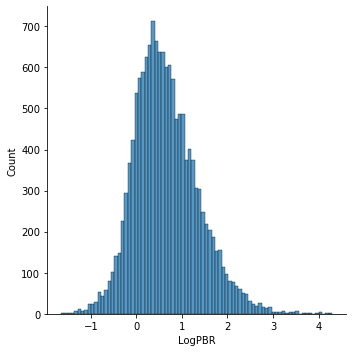

In [43]:
sns.displot(IntersectionFrames_df_Minimum, x="LogPBR")
IntersectionFrames_df_Minimum["LogPBR"].describe()

count    14640.000000
mean         0.035704
std          0.156678
min         -1.465872
25%         -0.039362
50%          0.017783
75%          0.100083
max          0.955511
Name: LogCBR, dtype: float64

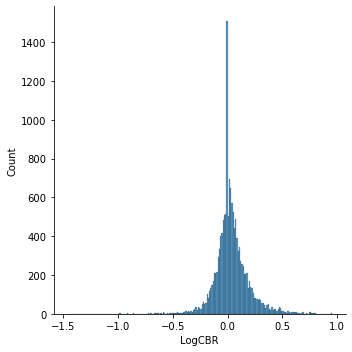

In [44]:
sns.displot(IntersectionFrames_df_Minimum, x="LogCBR")
IntersectionFrames_df_Minimum["LogCBR"].describe()

## Load langauge equivalence and cosine similarity data

In [11]:
equiv_df = pd.read_csv("df_equiv_2009_2019.csv",sep=',',index_col=None,header=0)

In [12]:
###Read in smaller equiv df datarames, featuring only langauges with more than 1000 users in a given year.
equiv_df_big_frames = []
for a_year in range(2009,2020):
    filename =  "df_equiv_big_"+str(a_year)+".csv"
    equiv_df_yearly = pd.read_csv(filename, index_col=None, header=0)
    equiv_df_big_frames.append(equiv_df_yearly)

equiv_df_big= pd.concat(equiv_df_big_frames, axis=0, ignore_index=True)


In [23]:
equiv_df

,Unnamed: 0,Year,Lang1,Lang2,Cosine,ObsExp
0,0,2009,javascript,javascript,1.000000,0.000000
1,1,2009,javascript,ruby,0.461111,0.626850
2,2,2009,javascript,c#,0.274243,0.001918
3,3,2009,javascript,java,0.272719,0.130482
4,4,2009,javascript,php,0.551083,0.753030
...,...,...,...,...,...,...
1059206,1059206,2019,nu,cirru,NaN,0.000000
1059207,1059207,2019,nu,opa,NaN,0.000000
1059208,1059208,2019,nu,shen,NaN,0.000000
1059209,1059209,2019,nu,omgrofl,NaN,0.000000


## Load year over year user data for individual languages

In [15]:
YearOverYear = pd.read_csv("YearOverYear.csv",sep=',',index_col=None,header=0)

##  Join user overlap and functional equivalence datasets

In [31]:
equiv_df[equiv_df['Year']==2010]

,Unnamed: 0,Year,Lang1,Lang2,Cosine,ObsExp
51984,51984,2010,c++,c++,1.000000,0.000000
51985,51985,2010,c++,objective-c,0.667956,0.613069
51986,51986,2010,c++,processing,0.222758,0.263291
51987,51987,2010,c++,javascript,-0.053020,-0.454545
51988,51988,2010,c++,perl,0.349207,0.150441
...,...,...,...,...,...,...
117004,117004,2010,apl,alloy,NaN,0.000000
117005,117005,2010,apl,tea,NaN,0.000000
117006,117006,2010,apl,jasmin,NaN,0.000000
117007,117007,2010,apl,fantom,NaN,0.000000


In [27]:
Intersection_Equiv_DF = IntersectionFrames_df_Minimum.merge(equiv_df,how ='inner', on=['Year','Lang1','Lang2'])

In [29]:
Intersection_Equiv_DF[Intersection_Equiv_DF['Year']==2010]

,Unnamed: 0_x,Year,BaseSample,Lang1,Lang2,L1Y1,L1Y2,L2Y1,L2Y2,L12Y1,...,LogPBR,L12Y1_L__Y2,L_2Y1_L__Y2,CBR_Num,CBR_Denom,CBR,LogCBR,Unnamed: 0_y,Cosine,ObsExp
0,0,2010,53822,ruby,c++,15563,17409,4029,4633,698,...,-0.464211,175,1795,0.735336,0.612845,1.199873,0.182216,54789,0.020734,-0.460761
1,1,2010,53822,ruby,c,15563,17409,6103,6836,1350,...,-0.243245,266,2373,0.652850,0.569626,1.146103,0.136368,54802,-0.009022,-0.227745
2,2,2010,53822,ruby,shell,15563,17409,3229,4993,1059,...,0.224413,187,1330,0.750943,0.764164,0.982699,-0.017452,54806,-0.065704,0.197152
3,3,2010,53822,ruby,javascript,15563,17409,14991,19010,5093,...,0.273017,480,3269,0.416569,0.420952,0.989588,-0.010467,54792,0.526208,0.600217
4,4,2010,53822,ruby,python,15563,17409,9577,11089,1380,...,-0.546226,299,2683,0.574946,0.380337,1.511676,0.413219,54796,0.214851,-0.211459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,2010,53822,php,scala,6831,7170,834,1119,36,...,-0.810403,18,354,0.756757,0.464330,1.629781,0.488445,57359,0.435008,-0.438581
122,122,2010,53822,php,emacs lisp,6831,7170,1231,1372,73,...,-0.960220,39,815,0.743243,0.735116,1.011055,0.010994,57347,0.170431,-0.482852
123,123,2010,53822,php,c#,6831,7170,2015,2170,114,...,-0.372891,43,843,0.713043,0.474238,1.503557,0.407834,57379,0.421496,-0.271315
124,124,2010,53822,php,viml,6831,7170,2547,3366,265,...,0.025538,102,1676,0.695489,0.784494,0.886544,-0.120424,57355,0.291880,-0.990558


In [30]:
Intersection_Equiv_DF.to_csv("IntersectionFrames.csv",sep=',')

#### Get interesection_equiv_df for all langauges.

In [25]:
IntersectionFrames_df

,Unnamed: 0,Year,BaseSample,Lang1,Lang2,L1Y1,L1Y2,L2Y1,L2Y2,L12Y1,...,PBR_Num,PBR_Denom,PBR,LogPBR,L12Y1_L__Y2,L_2Y1_L__Y2,CBR_Num,CBR_Denom,CBR,LogCBR
0,0,2010,53822,ruby,c++,15563,17409,4029,4633,698,...,0.044867,0.071373,0.628631,-0.464211,175,1795,0.735336,0.612845,1.199873,0.182216
1,1,2010,53822,ruby,c,15563,17409,6103,6836,1350,...,0.075911,0.096816,0.784079,-0.243245,266,2373,0.652850,0.569626,1.146103,0.136368
2,2,2010,53822,ruby,shell,15563,17409,3229,4993,1059,...,0.097346,0.077778,1.251588,0.224413,187,1330,0.750943,0.764164,0.982699,-0.017452
3,3,2010,53822,ruby,javascript,15563,17409,14991,19010,5093,...,0.321555,0.244729,1.313923,0.273017,480,3269,0.416569,0.420952,0.989588,-0.010467
4,4,2010,53822,ruby,python,15563,17409,9577,11089,1380,...,0.082064,0.141702,0.579131,-0.546226,299,2683,0.574946,0.380337,1.511676,0.413219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37865,9307,2018,100000,dockerfile,vim script,1026,1215,775,451,25,...,0.010978,0.003879,2.830232,1.040359,14,674,0.807692,0.925433,0.872773,-0.136080
37866,9308,2018,100000,dockerfile,roff,1026,1215,147,76,5,...,0.004892,0.000729,6.715658,1.904442,3,138,1.000000,0.993007,1.007042,0.007018
37867,9309,2018,100000,dockerfile,shaderlab,1026,1215,68,77,3,...,0.000977,0.000657,1.486028,0.396107,3,52,1.000000,0.803030,1.245283,0.219363
37868,9310,2018,100000,dockerfile,webassembly,1026,1215,61,25,2,...,0.000976,0.000233,4.195801,1.434084,1,54,1.000000,0.950000,1.052632,0.051293


In [45]:
Intersection_Equiv_DF_All = IntersectionFrames_df.merge(equiv_df,how ='inner', on=['Year','Lang1','Lang2'])

In [46]:
Intersection_Equiv_DF_All.to_csv("IntersectionFramesAll.csv",sep=',')

C:\Users\adsir\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\adsir\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


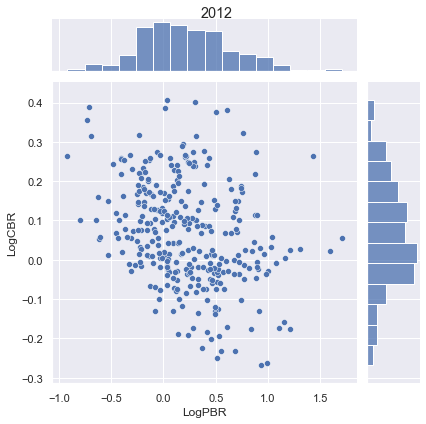

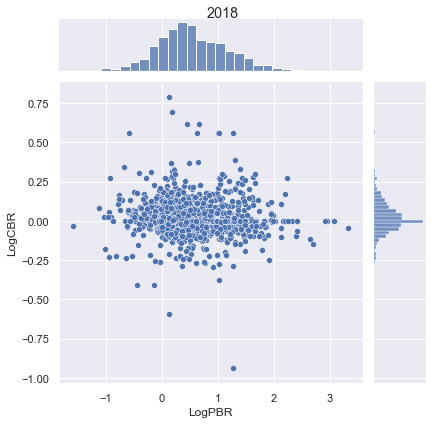

In [165]:
p=sns.jointplot("LogPBR", "LogCBR", data=Intersection_Equiv_DF[Intersection_Equiv_DF['Year']==2012])
p.fig.suptitle("2012")
p.fig.subplots_adjust(top=0.95)
p=sns.jointplot("LogPBR", "LogCBR", data=Intersection_Equiv_DF[Intersection_Equiv_DF['Year']==2018])
p.fig.suptitle("2018")
p.fig.subplots_adjust(top=0.95)
#sns.jointplot("LogCBR", "LogPBR", data=Intersection_Equiv_DF[Intersection_Equiv_DF['Year']==2018]).suptitle('2018')

Summary stats/visuals for calculated edges.

In [ ]:
equiv_df[sns.histogram(column='ObsExp')]

In [ ]:
#subset_df = equiv_df[equiv_df['Year']>2010
#g = sns.FacetGrid(subset_df, col="Year", col_wrap=4, height=2, ylim=(0, 8))
for a_year in range(2009,2019):
    a_year_equiv_df = equiv_df[equiv_df['Year']==a_year]
    #fig, axs = plt.subplots(nrows=3)
    #sns.ecdfplot(a_year_equiv_df, x="Cosine")
    #sns.ecdfplot(a_year_equiv_df, x="ObsExp")
    fig1=sns.jointplot("Cosine", "ObsExp",data =a_year_equiv_df, marginal_kws=dict(bins=20),ylim=(-7,7),xlim=(-1.1,1.1)).set_axis_labels(xlabel='Cosine Similarity of Langauges',ylabel='Observed/Exprected Ratio of Co-occurrences').fig.suptitle(a_year,y=1.0)
    #plt.title('Season Winners Goal and Win Regression', y=1.3, fontsize = 16)
    savestring = 'CosineOverlap'+str(a_year)+'.png'
    plt.savefig(savestring)
    #fig.subplots_adjust(top=0.95)
    #a_year = 2016
    #a_year_equiv_df = equiv_df[equiv_df['Year']==a_year]
    #fig, axs = plt.subplots(nrows=3)
    #sns.ecdfplot(a_year_equiv_df, x="Cosine")
    #sns.ecdfplot(a_year_equiv_df, x="ObsExp")
    #fig2=sns.jointplot("Cosine", "ObsExp",data =a_year_equiv_df, marginal_kws=dict(bins=20),ylim=(-6,6),xlim=(-1.1,1.1)).set_axis_labels(xlabel='Cosine Similarity of Langauges',ylabel='Observed/Exprected Ratio of Co-occurrences').fig.suptitle(a_year,y=1.0)
    #plt.savefig('CosineOverlap2016.png')



In [ ]:
a_year_equiv_df.dropna(subset=['Lang1', 'Lang2'])


In [ ]:
a_year_equiv_df[["Cosine","ObsExp"]].describe()

# 2. Linear Models/Visualizations of Language Pairs

## Visualizations showing relationship between language functionality and user overlap

C:\Users\adsir\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


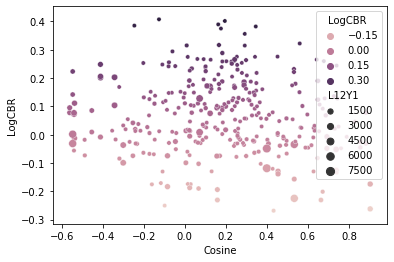

In [24]:
sns.scatterplot("Cosine", "LogCBR",hue='LogCBR',size = 'L12Y1',data=Intersection_Equiv_DF[Intersection_Equiv_DF['Year']==2012])
#sns.scatterplot("Cosine", "ObsExp",hue='LogCBR',size = 'L12Y1',data=Intersection_Equiv_DF[Intersection_Equiv_DF['Year']==2012])

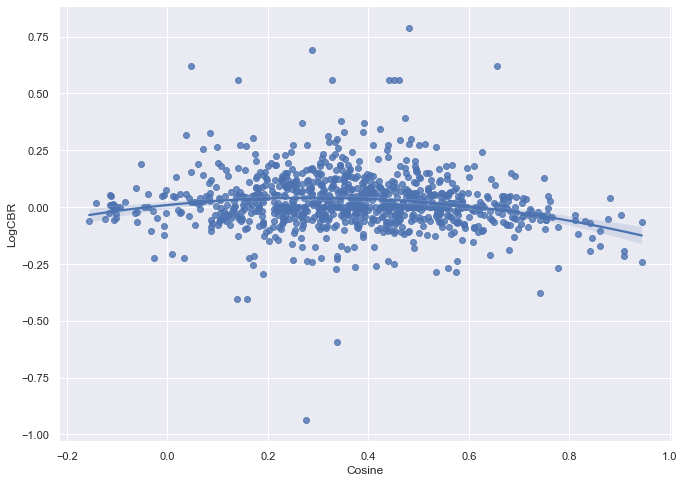

In [195]:
sns.regplot("Cosine", "LogCBR", data=Intersection_Equiv_DF[Intersection_Equiv_DF['Year']==2018],order=2)

In [25]:
from sklearn import linear_model
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf

In [28]:
reg = linear_model.LinearRegression()
model1 = reg.fit(Intersection_Equiv_DF[Intersection_Equiv_DF['Year']==2018][['Cosine', 'ObsExp']], Intersection_Equiv_DF[Intersection_Equiv_DF['Year']==2018]['LogCBR'])

In [60]:
TheYear = 2016
LinearRegFrame = Intersection_Equiv_DF[Intersection_Equiv_DF['Year']==TheYear]
LinearRegFrame["Cosine_ObsExp"] = LinearRegFrame["Cosine"] * LinearRegFrame["ObsExp"]
LinearRegFrame["Cosine_Sq"] = LinearRegFrame["Cosine"] * LinearRegFrame["Cosine"]
LinearRegFrame["ObsExp_Sq"] = LinearRegFrame["ObsExp"] * LinearRegFrame["ObsExp"]

###The Model
X =LinearRegFrame[['Cosine','ObsExp','Cosine_Sq','ObsExp_Sq','Cosine_ObsExp']]
Y1 =LinearRegFrame['LogCBR']
Y2  =LinearRegFrame['LogPBR']
X2 = sm.add_constant(X)
est1 = sm.OLS(Y1, X2)
est1f = est1.fit()
est2 = sm.OLS(Y2, X2)
est2f = est2.fit()
print(est1f.summary())
print(est2f.summary())

                            OLS Regression Results                            
Dep. Variable:                 LogCBR   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     9.586
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           7.00e-09
Time:                        20:53:20   Log-Likelihood:                 538.92
No. Observations:                 756   AIC:                            -1066.
Df Residuals:                     750   BIC:                            -1038.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0024      0.007     -0.324

<ipython-input-60-f178ecae7548>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LinearRegFrame["Cosine_ObsExp"] = LinearRegFrame["Cosine"] * LinearRegFrame["ObsExp"]
<ipython-input-60-f178ecae7548>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LinearRegFrame["Cosine_Sq"] = LinearRegFrame["Cosine"] * LinearRegFrame["Cosine"]
<ipython-input-60-f178ecae7548>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [ ]:
est = smf.ols(formula='CannibalRate ~  Cosine * ObsExp * LangBYear2', data=subset_df_year_big).fit()
#est2 = est.fit()
print(est.summary())

# 3. Network Analysis and Visualization

In [7]:
from scipy.cluster import hierarchy
from scipy.spatial import distance

In [8]:
import sklearn
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.preprocessing import scale

In [9]:
import math

In [115]:
sns.set(rc={'figure.figsize':(11,8)})

In [ ]:
###Blockmodellzzzz

In [11]:
#this function creates a network object for a given year.
def panda_to_net(dataframe_edges,dataframe_nodes,yeartotals,year,
                 node_cutoff,edge_type,edge_cutoff,show_edge_weights = True,drop_isolates=False,visualize = True):
    #filter down to year
    yearedgeframe = dataframe_edges[dataframe_edges['Year']==year]
    yeartotalframe= yeartotals[yeartotals['Year']==year]
    #filter down to only edges of certain strength
    edgeframe = yearedgeframe[yearedgeframe[edge_type]>edge_cutoff]
    #create network with an attribute
    the_net = nx.from_pandas_edgelist(edgeframe, 'Lang1', 'Lang2',edge_attr = edge_type)
    #filter network down to only languages of certain size
    yeartotalframe_subset = list(yeartotalframe[yeartotalframe['ThisYearTotal']>node_cutoff]['Language'].unique())
    #build dictionary of node indicies (returned by function)
    node_index_dict = {}
    counter = 0
    for node in yeartotalframe_subset:
        node_index_dict[node] = counter
        counter = counter+1
    #edge frame for viz
    edgeframe = edgeframe[edgeframe['Lang1'].isin(yeartotalframe_subset) & edgeframe['Lang2'].isin(yeartotalframe_subset)]
    #edge frame to return (all strengths)
    yearedgeframe = yearedgeframe[yearedgeframe['Lang1'].isin(yeartotalframe_subset) & yearedgeframe['Lang2'].isin(yeartotalframe_subset)]
    sub_net = the_net.subgraph(yeartotalframe_subset).copy()
    the_attributes = [i[edge_type] for i in dict(sub_net.edges).values()]
    if drop_isolates == True:
        for x in (nx.isolates(sub_net)):
            print(x)
        sub_net.remove_nodes_from(nx.isolates(sub_net))
    if visualize == True:
        pos = nx.spring_layout(sub_net, seed=1)
        nx.draw_networkx_nodes(sub_net,pos,node_size=10)
        nx.draw_networkx_labels(sub_net, pos, font_size=2, font_family="sans-serif")
        if show_edge_weights ==True:
            the_attributes = [i[edge_type] for i in dict(sub_net.edges).values()]
            nx.draw_networkx_edges(sub_net,pos,width=the_attributes)
        else:
            nx.draw_networkx_edges(sub_net,pos)
    return sub_net,yearedgeframe,yeartotalframe_subset,node_index_dict
#the_net.add_edge(a_row[])
    

In [17]:
def panda_to_full_viz(dataframe_edges,dataframe_nodes,node_cutoff,year,usepos=None):
    #produces multifacteted network diagram for langauges for one year, for all nodes over one cutoff.
    #filter edges and nodes down to year.
    dataframe_nodes_year = dataframe_nodes[(dataframe_nodes['Year']==year) & (dataframe_nodes['ThisYearTotal'] > node_cutoff)]
    nodes_subset = dataframe_nodes_year['Language'].unique()
    dataframe_edges_year = dataframe_edges[(dataframe_edges['Year']==year) & (dataframe_edges['Lang1'].isin(nodes_subset)) & (dataframe_edges['Lang2'].isin(nodes_subset))]
    dataframe_edges_year
    lang_sizes = {}
    yoy_growth = {}
    yoy_buckets = {}
    for y,x in dataframe_nodes_year.iterrows():
        #print(x)
        lang_sizes[x['Language']] = x['ThisYearTotal']
        yoy_growth[x['Language']] = x['NextYearTotal']/x['ThisYearTotal']
        if ((x['NextYearTotal']/x['ThisYearTotal'])>1.8):
            yoy_buckets[x['Language']] = 0.9
        elif ((x['NextYearTotal']/x['ThisYearTotal'])<1.2):
            yoy_buckets[x['Language']] = 0.1
        else:
            yoy_buckets[x['Language']] =0.5
    plt.grid(None)
    the_net = nx.from_pandas_edgelist(dataframe_edges_year, 'Lang1', 'Lang2',edge_attr = ['Cosine','ObsExp'])
    ####Draw first net for edge cosine
    weights = [the_net[u][v]['ObsExp']*3 for u,v in the_net.edges]
    #print(weights)
    #edge_colors = [(the_net[u][v]['ObsExp']>0) for u,v in the_net.edges]
    edge_colors=[]
    #edge_styles=[]
    for u,v in the_net.edges:
        if the_net[u][v]['ObsExp']>0:
            edge_colors.append('blue')
            #edge_styles.append('solid')
        else:
            edge_colors.append('red')
            #edge_styles.append('dotted')
    weights2 = [(the_net[u][v]['Cosine']-0)*1 for u,v in the_net.edges]
    if usepos ==None:
        pos = nx.spring_layout(the_net,weight='ObsExp')
    else:
        pos = usepos
    nx.draw_networkx_nodes(the_net,pos,node_size=[v * 100/node_cutoff for v in lang_sizes.values()])#,
                        #cmap=plt.get_cmap('viridis'),
                        #node_color =[x for x in yoy_buckets.values()])
    nx.draw_networkx_labels(the_net,pos,font_size=15,font_family="sans-serif",font_color='black')
    nx.draw_networkx_edges(the_net,pos,width=weights,edge_color=edge_colors,alpha=0.25)
    return pos
    
    #nx.draw_networkx_edges(the_net,pos,width=weights2,edge_color='red',alpha=0.25) 
    ####Draw second net for observed/expected

In [18]:
pos = panda_to_full_viz(equiv_df,YearOverYear,25000,2018)
#equiv_df

NameError: name 'YearOverYear' is not defined

In [21]:
####Look at relationship between node orthoganality and node proximity.
# For each pair - relative growth to each other in next year.
# Orthogonal languages - should grow together?





In [ ]:
def cos_clustrify(node_dict,sample_edges):
    overlap_matrix = np.zeros((len(node_dict), len(node_dict)))
    for x,y in sample_edges.iterrows():
        the_row = node_dict[y['Lang1']]
        the_column = node_dict[y['Lang2']]
        if the_row!=the_column:
            overlap_matrix[the_row][the_column] = 1-round(y['Cosine'],3)
        else:
            overlap_matrix[the_row][the_column]=0
    Y = distance.squareform(overlap_matrix)
    Z = hierarchy.complete(Y)
    membership = list(hierarchy.fcluster(Z, t=1.15))
    Langs = []
    Clusters = []
    for a,b in node_dict.items():
        Langs.append(a)
        Clusters.append(membership[b])
    MembershipFrame = pd.DataFrame({'Language':Langs,'Clusters':Clusters})
    return MembershipFrame,Z

In [ ]:
#test_network function
sample_net,sample_edges,sample_nodes,node_dict = panda_to_net(equiv_df,user_overlap_df,YearOverYear,year = 2018,node_cutoff = 10000,edge_type = 'Cosine', edge_cutoff = 0.5,show_edge_weights=False,drop_isolates=True)

In [ ]:
overlap_matrix = np.zeros((len(node_dict), len(node_dict)))
for x,y in sample_edges.iterrows():
    the_row = node_dict[y['Lang1']]
    the_column = node_dict[y['Lang2']]
    if the_row!=the_column:
        overlap_matrix[the_row][the_column] = 1-round(y['Cosine'],3)
    else:
        overlap_matrix[the_row][the_column]=0
Y = distance.squareform(overlap_matrix)
Z = hierarchy.complete(Y)
membership = list(hierarchy.fcluster(Z, t=1.15))
print(membership)


In [ ]:
Langs = []
Clusters = []
for a,b in node_dict.items():
    Langs.append(a)
    Clusters.append(membership[b])
MembershipFrame = pd.DataFrame({'Language':Langs,'Clusters':Clusters})

In [ ]:
MembershipFrame,Z = cos_clustrify(node_dict,sample_edges)
MembershipFrame

In [ ]:
YearOfFocus = 2014
ThisYearFloor = 2000
NextYearFloor = 0
YearOverYear_OneYear = YearOverYear[(YearOverYear['Year']==YearOfFocus) & (YearOverYear['ThisYearTotal']>ThisYearFloor)& (YearOverYear['NextYearTotal']>NextYearFloor)]
YearOverYear_OneYear['Growth'] = YearOverYear_OneYear['NextYearTotal']/YearOverYear_OneYear['ThisYearTotal']
YearOverYear_OneYear['LogUsers'] = np.log(YearOverYear_OneYear['ThisYearTotal']*1.0)
YearOverYear_OneYear['LogGrowth'] = np.log(YearOverYear_OneYear['Growth']*1.0)

In [ ]:
YearOverYear_OneYear= YearOverYear_OneYear.merge(MembershipFrame, left_on='Language', right_on='Language')
YearOverYear_OneYear.sort_values(['Clusters','ThisYearTotal'])

In [ ]:
sns.scatterplot(data=YearOverYear_OneYear, x="LogUsers", y="LogGrowth",hue='Clusters', palette="Paired")
sns.color_palette("Paired")

In [ ]:
sns.relplot(data=YearOverYear_OneYear, x="LogUsers", y="LogGrowth",col='Clusters')

In [57]:
def OneOnOne(Lang1,Lang2):
    YearOverYear_Subset = YearOverYear[YearOverYear['Language'].isin([Lang1,Lang2])]
    YearOverYear_Subset['LogUsers'] = np.log(YearOverYear_Subset['ThisYearTotal']*1.0)
    sns.lineplot(data = YearOverYear_Subset,x='Year',y='LogUsers',hue='Language')
    ax2 = plt.twinx()
    Equiv_Subset = equiv_df[equiv_df['Lang1'].isin([Lang1,Lang2]) & equiv_df['Lang2'].isin([Lang1,Lang2])]
    Equiv_Subset = Equiv_Subset[Equiv_Subset['Lang1'] > Equiv_Subset['Lang2']]
    #print(Equiv_Subset)
    sns.scatterplot(data=Equiv_Subset,x='Year',y='Cosine',ax=ax2,label='Cosine Similarity',markers=True)
    sns.scatterplot(data=Equiv_Subset,x='Year',y='ObsExp',ax=ax2,label='Log Observed/Expected',markers=True)
    sns.scatterplot(data=YearOverYear_Subset,x='Year',y='AUsingB',ax=ax,label='Percentage of A Users Using B',markers=True)
    #sns.scatterplot(data=Equiv_Subset,x='Year',y='BUsingA',ax=ax2,label='Percentage of B Users Using A',markers=True)
    #return Equiv_Subset
    #User_Overlap_Subset = user_overlap_df[user_overlap_df['Lang1'].isin([Lang1,Lang2]) & user_overlap_df['Lang2'].isin([Lang1,Lang2])]
    #User_Overlap_Subset['']

    

In [41]:
def OneOnOne_Overlap(Lang1,Lang2):
    User_Overlap_Subset = user_overlap_df[user_overlap_df['Lang1'].isin([Lang1,Lang2]) & user_overlap_df['Lang2'].isin([Lang1,Lang2])]
    #sns.lineplot(data = User_Overlap_Subset,x='Year',y='LangAYear1')
    #sns.lineplot(data = User_Overlap_Subset,x='Year',y='LangBYear1')
    sns.lineplot(data = User_Overlap_Subset,x='Year',y='IntersectYear1')

In [28]:
def OneOnOne(TheLang1,TheLang2):
    User_Overlap_Subset = user_overlap_df[(user_overlap_df['Lang1'].isin([TheLang1,TheLang2]))&(user_overlap_df['Lang2'].isin([TheLang1,TheLang2]))&(user_overlap_df['Year']>2008)]
    User_Overlap_Subset = User_Overlap_Subset[User_Overlap_Subset['Lang1'] > User_Overlap_Subset['Lang2']]
    User_Overlap_Subset['Total_Using_A'] = User_Overlap_Subset['LangAYear1']/ User_Overlap_Subset['TotalYear1']
    User_Overlap_Subset['Total_Using_B'] = User_Overlap_Subset['LangBYear1']/ User_Overlap_Subset['TotalYear1']
    User_Overlap_Subset['A_Using_B'] = User_Overlap_Subset['IntersectYear1']/ (User_Overlap_Subset['LangAYear1']+.01)
    User_Overlap_Subset['B_Using_A'] = User_Overlap_Subset['IntersectYear1']/ (User_Overlap_Subset['LangBYear1']+.01)
    #print(User_Overlap_Subset)
  #YearOverYear_Subset['LogUsers'] = np.log(YearOverYear_Subset['ThisYearTotal']*1.0)
    sns.lineplot(data = User_Overlap_Subset,x='Year',y='Total_Using_A',color='blue',label='Total Users Using '+str(TheLang1))
    sns.lineplot(data = User_Overlap_Subset,x='Year',y='Total_Using_B',color='orange',label='Total Users Using '+str(TheLang2))
    sns.lineplot(data = User_Overlap_Subset,x='Year',y='A_Using_B',color='orange',linestyle='--',label=str(TheLang1)+ ' Users Using ' +str(TheLang2))
    sns.lineplot(data = User_Overlap_Subset,x='Year',y='B_Using_A',color='blue',linestyle='--',label=str(TheLang2)+ ' Users Using ' +str(TheLang1))
    ax2 = plt.twinx()
    Equiv_Subset = equiv_df[equiv_df['Lang1'].isin([TheLang1,TheLang2]) & equiv_df['Lang2'].isin([TheLang1,TheLang2])&(equiv_df['Year']>2008)&(equiv_df['Year']<2019)]
    Equiv_Subset = Equiv_Subset[Equiv_Subset['Lang1'] > Equiv_Subset['Lang2']]
    #ax2.legend(loc=1)
    #print(Equiv_Subset)
    sns.scatterplot(data=Equiv_Subset,x='Year',y='Cosine',ax=ax2,label='Cosine Similarity',markers=True)
    sns.scatterplot(data=Equiv_Subset,x='Year',y='ObsExp',ax=ax2,label='Log Observed/Expected',markers=True)
    #sns.scatterplot(data=YearOverYear_Subset,x='Year',y='AUsingB',ax=ax,label='Percentage of A Users Using B',markers=True)
    #sns.scatterplot(data=Equiv_Subset,x='Year',y='BUsingA',ax=ax2,label='Percentage of B Users Using A',markers=True)
    #return Equiv_Subset
    #User_Overlap_Subset = user_overlap_df[user_overlap_df['Lang1'].isin([Lang1,Lang2]) & user_overlap_df['Lang2'].isin([Lang1,Lang2])]
    #User_Overlap_Subset['']

    

In [53]:
user_overlap_df['AUsingB']= user_overlap_df['IntersectYear1']/user_overlap_df['LangAYear1']
#user_overlap_df['BUsingA']= user_overlap_df['IntersectYear1']/user_overlap_df['LangBYear1']

In [100]:
equiv_df

,Unnamed: 0,Year,Lang1,Lang2,Cosine,ObsExp
0,0,2009,javascript,javascript,1.000000,0.000000
1,1,2009,javascript,ruby,0.461111,0.626850
2,2,2009,javascript,c#,0.274243,0.001918
3,3,2009,javascript,java,0.272719,0.130482
4,4,2009,javascript,php,0.551083,0.753030
...,...,...,...,...,...,...
1059206,1059206,2019,nu,cirru,NaN,0.000000
1059207,1059207,2019,nu,opa,NaN,0.000000
1059208,1059208,2019,nu,shen,NaN,0.000000
1059209,1059209,2019,nu,omgrofl,NaN,0.000000


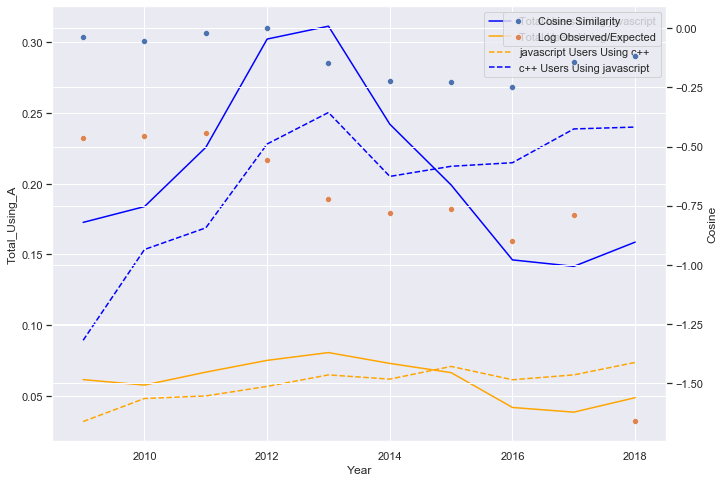

In [29]:
#OneOnOne('haskell','go') ###go eats haskell - - Cluster 2
#OneOnOne('scala','groovy') ###Scala and Groovy grow together? 
#OneOnOne('swift','clojure')  ### Parasites - swift eats clojure - shift in obsexp, high similarity. - - Cluster 3
OneOnOne('javascript','c++')

#OneOnOne('r','matlab') 


#OneOnOne('python','php') ###grow together with the platform, little similarity in terms of use, as platform increases dissimilarity increases.
#OneOnOne_Overlap('haskell','go')

In [ ]:
user_overlap_df

In [ ]:
sample

In [ ]:
def create_hc(G):
    """Creates hierarchical cluster of graph G from distance matrix"""
    ####rewrite this to feature overlaps
    path_length = nx.all_pairs_shortest_path_length(G)

    distances = np.zeros((len(G), len(G)))
    for u, p in path_length:
        for v, d in p.items():
            distances[u][v] = d
    # Create hierarchical cluster
    Y = distance.squareform(distances)
    Z = hierarchy.complete(Y)  # Creates HC using farthest point linkage
    # This partition selection is arbitrary, for illustrive purposes
    membership = list(hierarchy.fcluster(Z, t=1.15))
    # Create collection of lists for blockmodel
    partition = defaultdict(list)
    for n, p in zip(list(range(len(G))), membership):
        partition[p].append(n)
    return list(partition.values())

In [ ]:
sample_output = nx.all_pairs_shortest_path_length(sample_net)
distances = np.zeros((len(sample_net), len(sample_net)))

In [ ]:
pos = nx.spring_layout(sample_net, seed=1)
nx.draw_networkx_nodes(sample_net,pos,node_size=10)
nx.draw_networkx_edges(sample_net,pos,width='Cosine')

#TheWeight = [SampleNets[2009][u][v]['weight']*0.1 for u,v in SampleNets[2009].edges()]
#nx.draw_networkx_edges(PlotNet, pos, width=TheWeight)
#nx.draw_networkx_labels(PlotNet, pos, font_size=2, font_family="sans-serif")

Looking at User Overlap Metrics

In [ ]:
user_overlap_df

In [ ]:
user_overlap_df['PiggybackRate'] = user_overlap_df['Piggybacking']/user_overlap_df['LangAYear1']
user_overlap_df['CannibalRate'] = user_overlap_df['Cannibalism']/user_overlap_df['LangAYear1']
user_overlap_df['LogPBRate'] =np.log(pd.to_numeric(user_overlap_df['PiggybackRate']+.001))
user_overlap_df['LogCBRate'] =np.log(pd.to_numeric(user_overlap_df['CannibalRate']+.001))

In [ ]:
user_overlap_df

In [ ]:
user_year = 2018
user_overlap_df_year = user_overlap_df[user_overlap_df['Year']==user_year].dropna(subset=['Lang1', 'Lang2'])
sns.jointplot("Cannibalism", "Piggybacking", data=user_overlap_df_year)
#sns.jointplot("ObsExp", "LogPBRate", data=subset_df)

In [ ]:
user_NaN = user_overlap_df.dropna(subset=['Lang1', 'Lang2'])

In [ ]:
user_NaN.sort_values(by='Cannibalism', ascending=False) 

In [ ]:
user_overlap_df_year.sort_values(by='Cannibalism', ascending=False) 

Merge two datasets and drop NaN instances from languages.

In [ ]:
joined_df=equiv_df.merge(user_overlap_df,how='inner', on=['Year','Lang1','Lang2']).dropna(subset=['Lang1', 'Lang2'])
subset_df=joined_df[joined_df['LangAYear1']>0]

In [ ]:
subset_df

In [ ]:
sns.jointplot("ObsExp", "LogPBRate", data=subset_df)
sns.jointplot("Cosine", "LogCBRate", data=subset_df)
sns.jointplot("Cosine", "LogPBRate", data=subset_df)
sns.jointplot("ObsExp", "LogCBRate", data=subset_df)

In [ ]:
user_year = 2018
language_user_cutoff_A = 1000
language_user_cutoff_B = 1000
subset_df_year = subset_df[subset_df['Year']==user_year]
subset_df_year_big = subset_df_year[(subset_df_year['LangAYear1'] > language_user_cutoff_A) & (subset_df_year['LangBYear1'] > language_user_cutoff_B)]
sns.jointplot("LogCBRate", "LogPBRate", data=subset_df_year_big)
#sns.jointplot("Cosine", "LogPBRate", data=subset_df_year_big)
#sns.jointplot("ObsExp", "LogPBRate", data=subset_df_year_big)


In [ ]:
for user_year in range(2009,2019):
    subset_df_year = subset_df[subset_df['Year']==user_year]
    subset_df_year_big = subset_df_year[(subset_df_year['LangAYear1'] > language_user_cutoff_A) & (subset_df_year['LangBYear1'] > language_user_cutoff_B)]
    fig1 = sns.jointplot("LogCBRate", "LogPBRate", data=subset_df_year_big).set_axis_labels(xlabel='Cannibalistic Diffusion Rate (Log)',ylabel='Complimentary Diffusion Rate (Log)').fig.suptitle(user_year,y=1.0)
    #fig1=sns.jointplot("Cosine", "ObsExp",data =a_year_equiv_df, marginal_kws=dict(bins=20),ylim=(-7,7),xlim=(-1.1,1.1)).set_axis_labels(xlabel='Cosine Similarity of Langauges',ylabel='Observed/Exprected Ratio of Co-occurrences').fig.suptitle(a_year,y=1.0)
    #plt.title('Season Winners Goal and Win Regression', y=1.3, fontsize = 16)
    savestring = 'DiffusionRates'+str(user_year)+'.png'
    plt.savefig(savestring)

In [ ]:
subset_df_year = subset_df[subset_df['Year']==2012]
subset_df_year_big = subset_df_year[(subset_df_year['LangAYear1'] > language_user_cutoff_A) & (subset_df_year['LangBYear1'] > language_user_cutoff_B)]
   

subset_df_year_big

In [ ]:
from pandas.stats import ols


In [ ]:
pip install pandas.stats.api

In [ ]:
est = sm.OLS(subset_df_year_big['LogCBRate'], (subset_df_year_big['Cosine'],subset_df_year_big['Cosine']))

In [ ]:
est2 = est.fit()
print(est2.summary())

Trying new set overlap data

In [ ]:
new_set_df = pd.read_csv("user_overlap_10_19_new_test2008.csv",sep=',',index_col=None,header=0)

In [ ]:
new_set_df